In [1]:
import pandas as pd
import numpy as np

from pyproj import Transformer as trf

In [2]:
import matplotlib as mpl
%matplotlib inline

from matplotlib import pyplot as plt

import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks', 
    {
        'axes.grid': True, 
        'axes.linewidth': '1',
        'grid.color': '0.5',
        'grid.linestyle': u':',
        'legend.frameon': True,
    })
xkcd = sns.xkcd_rgb

rc_opt = {
    "font.family": "serif",
    "font.size": 15,
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{libertine} \usepackage[libertine]{newtxmath}",
}
mpl.rcParams.update(rc_opt)

In [3]:
def to_sec(dt):
    if dt is not None:
        return dt.hour * 3600 + dt.minute * 60 + dt.second


In [4]:
df_gps = pd.read_csv("../csv/GPS_2022-07-03_CouncilSurvey_small.csv")
df_gps

,pos,lat,lon,alt,time,speed,bearing,acc,heartRate,cadence,temperature,strides,speed_sensor,custom_coords
0,1,64.844284,-163.710955,47,2022-07-04T08:26:46.000+0900,0.00,3,5.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2,64.844296,-163.710935,48,2022-07-04T08:27:29.000+0900,0.23,0,4.02,NaN,NaN,NaN,NaN,NaN,NaN
2,3,64.844301,-163.710912,48,2022-07-04T08:27:39.211+0900,0.00,1,3.63,NaN,NaN,NaN,NaN,NaN,NaN
3,4,64.844312,-163.710908,49,2022-07-04T08:27:49.000+0900,0.65,292,3.66,NaN,NaN,NaN,NaN,NaN,NaN
4,5,64.844347,-163.710823,48,2022-07-04T08:27:58.095+0900,0.57,11,4.34,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,545,64.843938,-163.710521,43,2022-07-04T10:06:26.000+0900,0.03,264,4.12,NaN,NaN,NaN,NaN,NaN,NaN
545,546,64.843931,-163.710536,43,2022-07-04T10:06:37.000+0900,0.00,254,3.68,NaN,NaN,NaN,NaN,NaN,NaN
546,547,64.843920,-163.710518,44,2022-07-04T10:08:07.000+0900,0.19,147,3.58,NaN,NaN,NaN,NaN,NaN,NaN
547,548,64.843929,-163.710530,45,2022-07-04T10:08:36.000+0900,0.16,87,3.84,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_gps.time = pd.to_datetime(df_gps.time) - pd.Timedelta(hours=17)
df_gps.time = df_gps.time.apply(to_sec)

In [6]:
df_gps = df_gps[['time', 'lat', 'lon', 'alt']]
df_gps

,time,lat,lon,alt
0,55606,64.844284,-163.710955,47
1,55649,64.844296,-163.710935,48
2,55659,64.844301,-163.710912,48
3,55669,64.844312,-163.710908,49
4,55678,64.844347,-163.710823,48
...,...,...,...,...
544,61586,64.843938,-163.710521,43
545,61597,64.843931,-163.710536,43
546,61687,64.843920,-163.710518,44
547,61716,64.843929,-163.710530,45


In [7]:
ll_proj = "epsg:4326"
co_proj = "epsg:3857"

trf_c2ll = trf.from_crs(co_proj, ll_proj)
trc_ll2c = trf.from_crs(ll_proj, co_proj)


def c2ll(x, y):
    return trf_c2ll.transform(x, y)


def ll2c(x, y):
    return trc_ll2c.transform(x, y)


print(ll2c(df_gps.iloc[0].lat, df_gps.iloc[0].lon))

print(c2ll(-18222177, 9567474))


(-18224220.147880524, 9567474.251323448)
(64.84428304030708, -163.69260109031208)


In [8]:
df_li = pd.read_csv(
    "../csv/LI7810_20220703_CouncilSurvey_small.csv",
    encoding="ISO-8859-1",
    skiprows=5,
    sep="\t",
)

(df_li := df_li.drop(0))

,DATAH,SECONDS,NANOSECONDS,NDX,DIAG,DATE,TIME,H2O,CO2,CH4,...,CAVITY_T,LASER_PHASE_P,LASER_T,RESIDUAL,RING_DOWN_TIME,THERMAL_ENCLOSURE_T,PHASE_ERROR,LASER_T_SHIFT,INPUT_VOLTAGE,CHK
1,DATA,1656886472,34782886,11,256,2022-07-03,14:14:32,NaN,NaN,NaN,...,20.8838,101.835,24.3412,0.000000,0,20.8081,-4000,0,24.1374,162
2,DATA,1656886473,34739017,15,256,2022-07-03,14:14:33,NaN,NaN,NaN,...,20.8838,101.988,27.3385,0.000000,0,20.8083,-16000,0,24.1068,231
3,DATA,1656886474,34704923,19,256,2022-07-03,14:14:34,NaN,NaN,NaN,...,20.8838,101.987,35.3524,0.000000,0,20.8088,-16000,0,24.1111,222
4,DATA,1656886475,34663915,23,256,2022-07-03,14:14:35,NaN,NaN,NaN,...,20.8838,101.988,38.978,0.000000,0,20.809,-16000,0,24.1174,144
5,DATA,1656886476,34624099,27,256,2022-07-03,14:14:36,NaN,NaN,NaN,...,20.8838,101.988,39.3032,0.000000,0,20.8096,-16000,0,24.1178,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,DATA,1656897052,85040092,38754,256,2022-07-03,17:10:52,10134.1,574.392,2068.27,...,55.0003,27.9497,40.118,0.001183,12.8958,54.4994,-6035.25,0.399702,15.0999,169
10007,DATA,1656897053,85040092,38758,356,2022-07-03,17:10:53,-3609.73,2461.24,77.8416,...,55.001,49.0072,40.1182,0.235987,-2463.15,54.4998,502,0.399702,15.1081,176
10008,DATA,1656897054,85040092,38762,356,2022-07-03,17:10:54,12221.2,-3321.5,2159.44,...,55.002,74.2081,40.1182,0.835352,-2555.67,54.4998,-3970.25,0.399702,15.1085,99
10009,DATA,1656897055,84703922,38766,356,2022-07-03,17:10:55,32633.3,-9732.98,4904.72,...,55.0026,80.6615,40.1184,0.417676,-1271.48,54.4998,3930,0.399702,15.1093,40


In [9]:
df_li["time"] = df_li[["DATE", "TIME"]].agg(" ".join, axis=1)
df_li["time"] = (
    pd.to_datetime(df_li["time"]) - pd.Timedelta(seconds=34)
)
df_li["time"]


1       2022-07-03 14:13:58
2       2022-07-03 14:13:59
3       2022-07-03 14:14:00
4       2022-07-03 14:14:01
5       2022-07-03 14:14:02
                ...        
10006   2022-07-03 17:10:18
10007   2022-07-03 17:10:19
10008   2022-07-03 17:10:20
10009   2022-07-03 17:10:21
10010   2022-07-03 17:10:22
Name: time, Length: 10010, dtype: datetime64[ns]

In [10]:
df_li.time = df_li.time.apply(to_sec)

In [11]:
df_li = df_li[['time', 'H2O', 'CO2', 'CH4']]
df_li

,time,H2O,CO2,CH4
1,51238,NaN,NaN,NaN
2,51239,NaN,NaN,NaN
3,51240,NaN,NaN,NaN
4,51241,NaN,NaN,NaN
5,51242,NaN,NaN,NaN
...,...,...,...,...
10006,61818,10134.1,574.392,2068.27
10007,61819,-3609.73,2461.24,77.8416
10008,61820,12221.2,-3321.5,2159.44
10009,61821,32633.3,-9732.98,4904.72


In [12]:
df_li[pd.to_numeric(df_li.CH4) > 0]

,time,H2O,CO2,CH4
899,52711,12308.4,-398.97,1907.5
900,52712,12722.4,144.348,2053.78
901,52713,12718.8,157.495,2054.08
902,52714,12719.3,157.987,2054.47
903,52715,11401.8,1344.98,1825.54
...,...,...,...,...
10006,61818,10134.1,574.392,2068.27
10007,61819,-3609.73,2461.24,77.8416
10008,61820,12221.2,-3321.5,2159.44
10009,61821,32633.3,-9732.98,4904.72


In [13]:
import numpy as np


# 1D Gaussian kernel
def gauss(x=11, sig=1):
    xx = np.linspace(-(x - 1) / 2, (x - 1) / 2, x)
    kernel = np.exp(-((xx / sig) ** 2) / 2) / (sig * np.sqrt(2 * np.pi))

    return kernel / np.sum(kernel)


# 2D Gaussian kernel
def gauss2d(x=5, sig=1):
    xx = np.linspace(-(x - 1) / 2, (x - 1) / 2, x)
    kernel = np.exp(-((xx / sig) ** 2) / 2) / (sig * np.sqrt(2 * np.pi))
    kernel = np.outer(kernel, kernel)

    return kernel / np.sum(kernel)


# Wrapper for convolution
def conv(arr, x=300, sig=300, type="gauss"):
    if np.nansum(arr) == 0:
        return arr

    # Pad input array at boundaries
    _a = np.concatenate((np.zeros(x // 2), arr, np.zeros(x // 2)))

    arr_m = np.nanmean(arr.astype(float))
    arr_sm = np.convolve(
        _a - arr_m,
        gauss(x=x, sig=sig),
        mode="same",
    )[int(x / 2) : int(-x / 2)]

    return arr_sm + arr_m


In [14]:
pd.to_numeric(df_li.CH4)

1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
           ...    
10006    2068.2700
10007      77.8416
10008    2159.4400
10009    4904.7200
10010    4904.7200
Name: CH4, Length: 10010, dtype: float64

(1800.0, 2200.0)

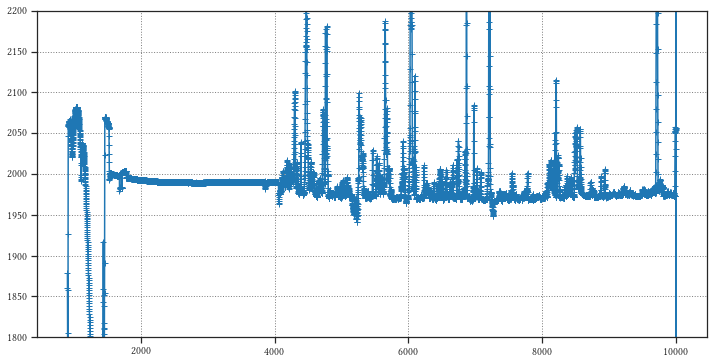

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(conv(pd.to_numeric(df_li.CH4), x=6, sig=10), "+-")

ax.set_ylim([1800, 2200])

In [19]:
from pyproj import Transformer as trf

ll_proj = "epsg:4326"
co_proj = "epsg:3857"

trf_c2ll = trf.from_crs(co_proj, ll_proj)
trf_ll2c = trf.from_crs(ll_proj, co_proj)


def c2ll(x, y):
    return trf_c2ll.transform(x, y)


def ll2c(x, y):
    return trf_ll2c.transform(x, y)


(9566500.0, 9568000.0)

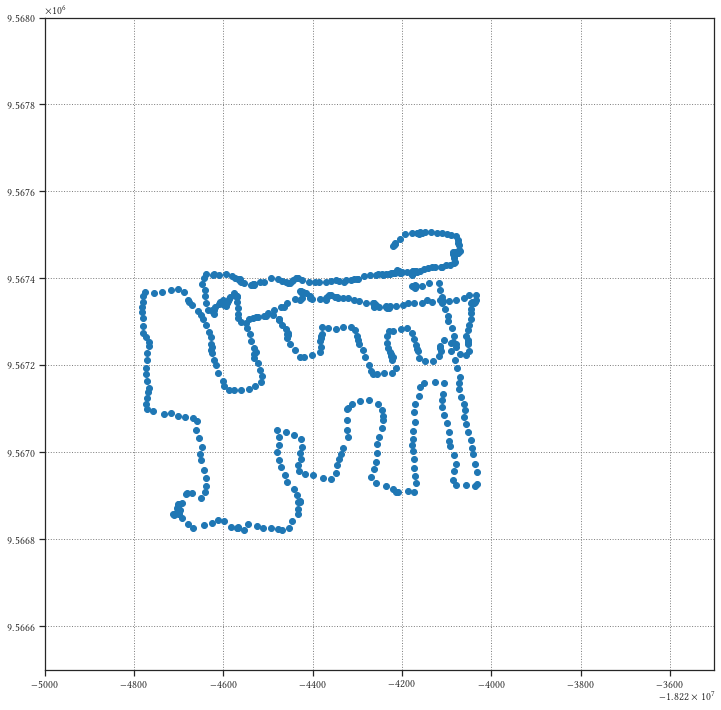

In [35]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

x, y = ll2c(df_gps.lat[:], df_gps.lon[:])

ax.scatter(x, y)

ax.set_xlim([-18225000, -18223500])
ax.set_ylim([9566500, 9568000])